In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [10]:
import sentencepiece

## train Hebrew Language Model on Wiki

after that, the TextList load all the text file from givven directory (so put attention to delete any unwanted text file inside this folder)

In [5]:
p = open("data/wiki/wikipedia.txt").read().split("\n")

In [6]:
spm = SPProcessor(lang="heb", vocab_sz=5000)
src = TextList.from_df(pd.DataFrame(p), processor=spm).random_split_by_pct(0.2).label_for_lm(ignore_empty=True, )

In [7]:
# save the spm
!cp tmp/spm.model .

In [8]:
wiki_data = src.databunch(bs=64)
# save the model and the data
wiki_data.save('wiki_data_spm.pkl')

functools.partial(<class 'fastai.text.models.awd_lstm.AWD_LSTM'>, n_layers=2)

In [20]:
# wiki_data = load_data(path, 'wiki_data_spm.pkl')
# create the model from the data
learn = language_model_learner(wiki_data, AWD_LSTM)

KeyError: functools.partial(<class 'fastai.text.models.awd_lstm.AWD_LSTM'>, n_layers=2)

## train the model

In [10]:
# we unfreeze all the model, beacuse he have totally random weight.
learn.unfreeze()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.save('heb_spm_1')

epoch,train_loss,valid_loss,accuracy,time
0,4.081431,3.855876,0.298150,32:36


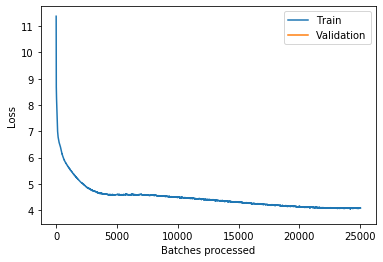

In [11]:
learn.recorder.plot_losses()

In [13]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.save('heb_spm_2')

epoch,train_loss,valid_loss,accuracy,time
0,3.981084,3.761016,0.309128,32:07


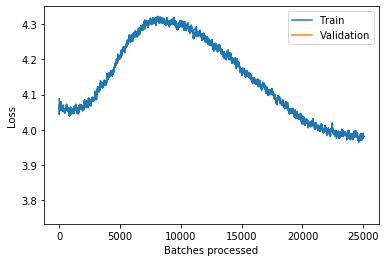

In [14]:
learn.recorder.plot_losses()

In [16]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))
learn.save('heb_spm_3')
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

##  results

the result seem very promising! <br>
whithout touch the data at all, and with 3 epoch, we achive very Reasonable results.

In [13]:
TEXT = "במהלך השנה 1948 קמה מדינת ישראל"
N_WORDS = 40
N_SENTENCES = 1
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

במהלך השנה 1948 קמה מדינת ישראל על בסיס ב-1941 , ונמשכה עד 1939 . 
  בשנת 1996 , לאחר פירוק הציונות הדתית , הוקם לייצוא מנגנון צמצום כללי של עליית הנוער . 
  מחברת למלאכה לייצר רק צלילים של שאלה , וגייס ענייני אידאולוגיות לכולם .


## export model

In [15]:
# wiki_data = load_data(path, 'wiki_data.pkl')
# learn = language_model_learner(wiki_data, AWD_LSTM)
# learn.load("heb_model_save_4")
learn.export("wiki_heb_spm.pkl")